In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [30]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    predictions = (sequential_model.predict(X_test_scaled) > 0.5).astype("int32")
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [2]:
df = pd.read_csv("valentine_dataset.csv")
df

,Name,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,Leon Cruz,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,Samuel Brown,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,Lori Baker,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,Tina Fitzgerald,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,Jason Simmons,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...,...
19995,Michael Vega,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,Debra Horn,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,Aaron Burgess,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,Rebecca Morton,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


In [3]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Income                0
Appearance_Score      0
Interests_Score       0
Confidence_Score      0
Educational_Status    0
Job_Type              0
Valentine_Date        0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Income                  int64
Appearance_Score      float64
Interests_Score       float64
Confidence_Score      float64
Educational_Status     object
Job_Type               object
Valentine_Date          int64
dtype: object

In [6]:
df["Name"].value_counts()

Name
Michael Johnson      13
Jennifer Williams     9
Michael Davis         8
Ashley Jones          8
Michael Williams      8
                     ..
Brianna Campbell      1
Michael Cox           1
Michael Cole          1
Jesse Meyer           1
Erik Curry            1
Name: count, Length: 17795, dtype: int64

In [7]:
df["Educational_Status"].value_counts()

Educational_Status
High School    5107
Bsc            4985
PhD            4955
Master         4953
Name: count, dtype: int64

In [8]:
df["Job_Type"].value_counts()

Job_Type
Employed         10014
Self Employed     9986
Name: count, dtype: int64

In [9]:
df["Gender"].value_counts()

Gender
Male      10047
Female     9953
Name: count, dtype: int64

In [10]:
educational_values = {"High School": 0, "Bsc":1, "PhD":2, "Master":3}

df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Job_Type"] = df["Job_Type"].apply(lambda x: 1 if x == "Employed" else 0)
df["Educational_Status"] = df["Educational_Status"].apply(lambda x: educational_values[x])

In [12]:
df.drop("Name", inplace=True, axis=1)

<Axes: xlabel='Educational_Status', ylabel='Income'>

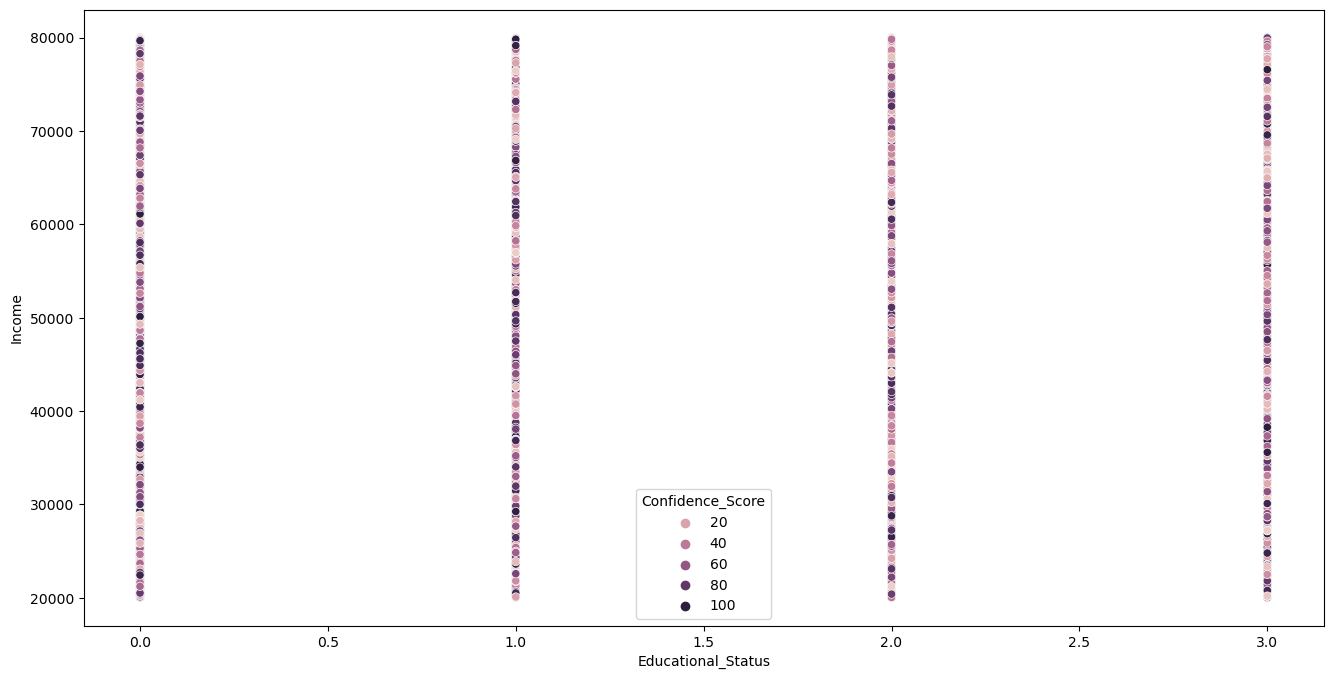

In [18]:
plt.figure(figsize=(16,8))
sns.scatterplot(y=df["Income"], x=df["Educational_Status"], hue= df['Confidence_Score'])

<Axes: xlabel='Income'>

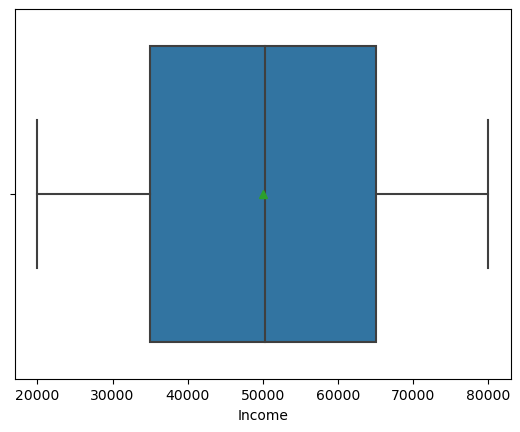

In [25]:
sns.boxplot(x="Income", showmeans=True, data=df)

<Axes: xlabel='Confidence_Score'>

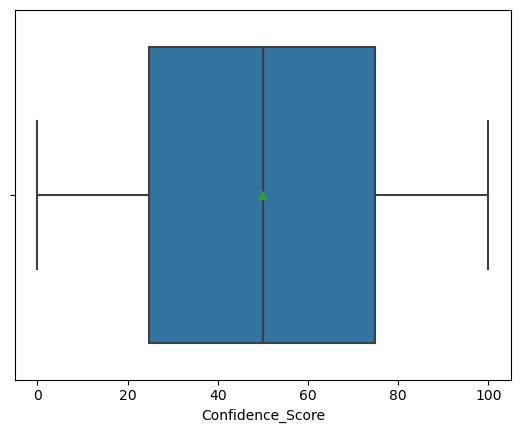

In [26]:
sns.boxplot(x="Confidence_Score", showmeans=True, data=df)

<Axes: ylabel='Frequency'>

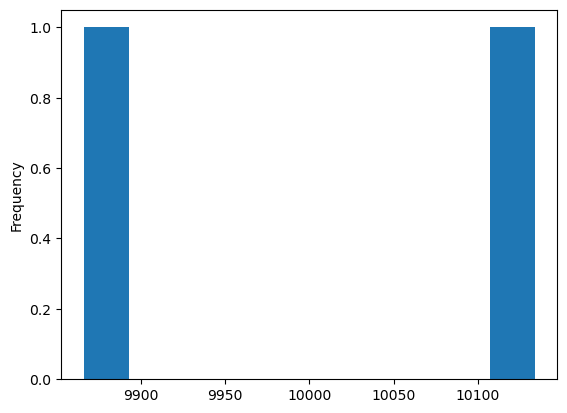

In [29]:
df["Valentine_Date"].value_counts().plot.hist()

In [31]:
X,y = df.drop("Valentine_Date", axis=1), df["Valentine_Date"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)

models

2024-03-26 21:17:55.738643: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
